In [85]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [86]:
data = pd.read_csv('OnlineRetail.csv' , encoding='latin1')

data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [87]:
#converting the type of Invoice Date Field from string to datetime.
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

#creating YearMonth field for the ease of reporting and visualization
data['InvoicYearMonth'] = data['InvoiceDate'].map(lambda data: 100*data.year +data.month)

#calculate Revenue for each row and create a new dataframe with YearMonth - Revenue columns
data['Revenue'] = data['UnitPrice'] * data['Quantity']
tx_Revenue = data.groupby(['InvoicYearMonth'])['Revenue'].sum().reset_index()

tx_Revenue

,InvoicYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


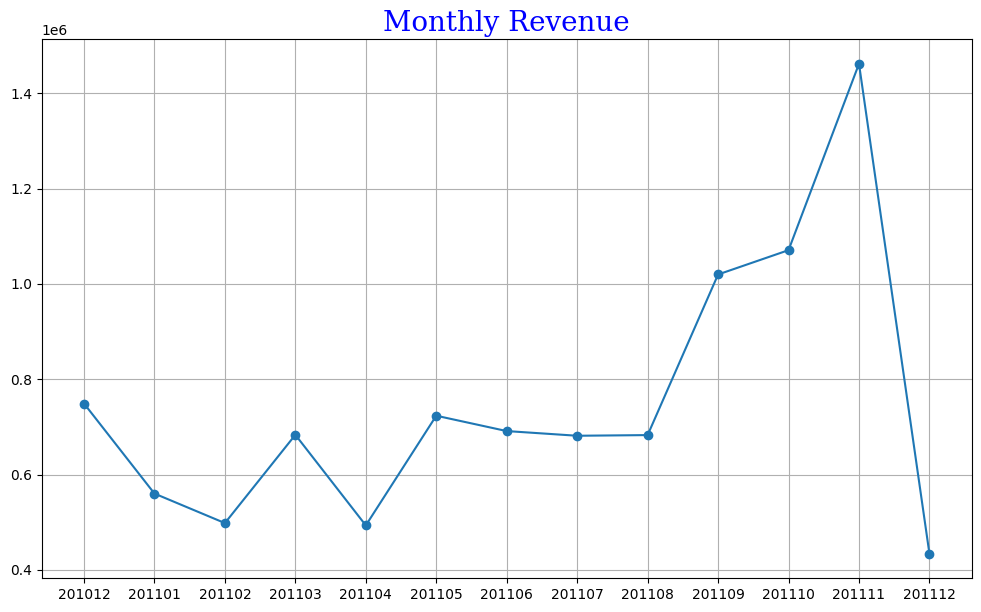

In [88]:
#X and Y axis inputs for Plotly graph. We use Scatter for line graphs
plt.figure(figsize=(12,7))
plt.plot(tx_Revenue['InvoicYearMonth'].to_numpy(dtype=str),tx_Revenue['Revenue'] , marker='o')

font={'family':'serif' , 'color':'blue' , 'size':20}
plt.title('Monthly Revenue', fontdict=font)
plt.grid()
plt.show()

In [89]:
#using pct_change() function to see monthly percentage change
tx_Revenue['MonthGrowth'] =tx_Revenue['Revenue'].pct_change()
#showing first 5 rows
tx_Revenue.head()

,InvoicYearMonth,Revenue,MonthGrowth
0,201012,748957.020,NaN
1,201101,560000.260,-0.252293
2,201102,498062.650,-0.110603
3,201103,683267.080,0.371850
4,201104,493207.121,-0.278163


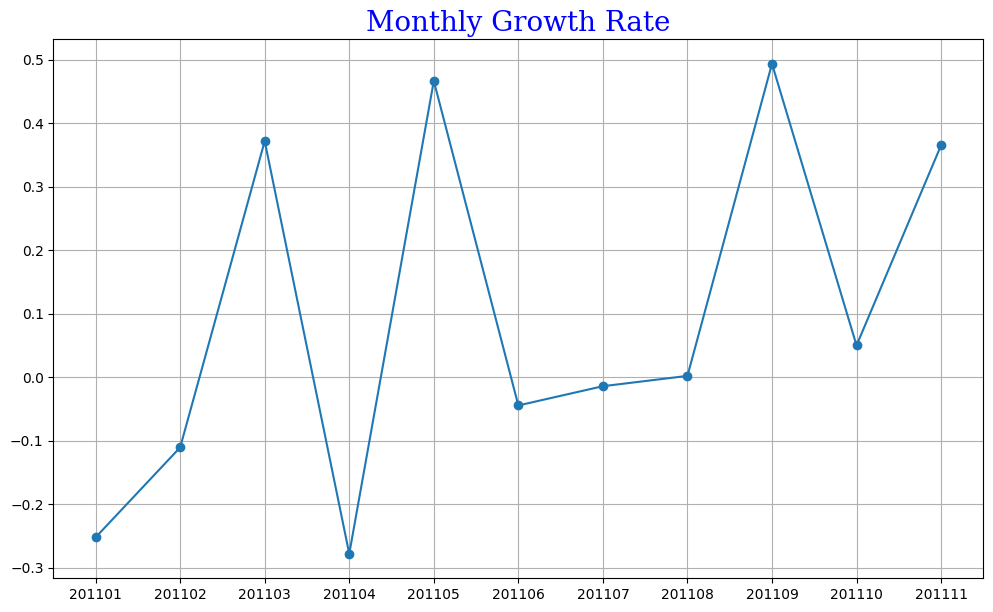

In [90]:
#visualization - line graph
plt.figure(figsize=(12,7))
plt.plot(tx_Revenue.query("InvoicYearMonth <  201112")['InvoicYearMonth'].to_numpy(dtype=str)
        ,tx_Revenue.query("InvoicYearMonth <  201112")['MonthGrowth'] ,   marker='o')


plt.title('Monthly Growth Rate', fontdict=font)
plt.grid()
plt.show()

In [91]:
#         ___________________________________ Monthly Active Customers________________________________________

#creating a new dataframe with UK customers only
tx_UK = data.query("Country=='United Kingdom'").reset_index(drop=True)

#creating monthly active customers dataframe by counting unique Customer IDs
tx_monthly_active = tx_UK.groupby(['InvoicYearMonth'])['CustomerID'].nunique().reset_index()
#print the dataframe
tx_monthly_active 


,InvoicYearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


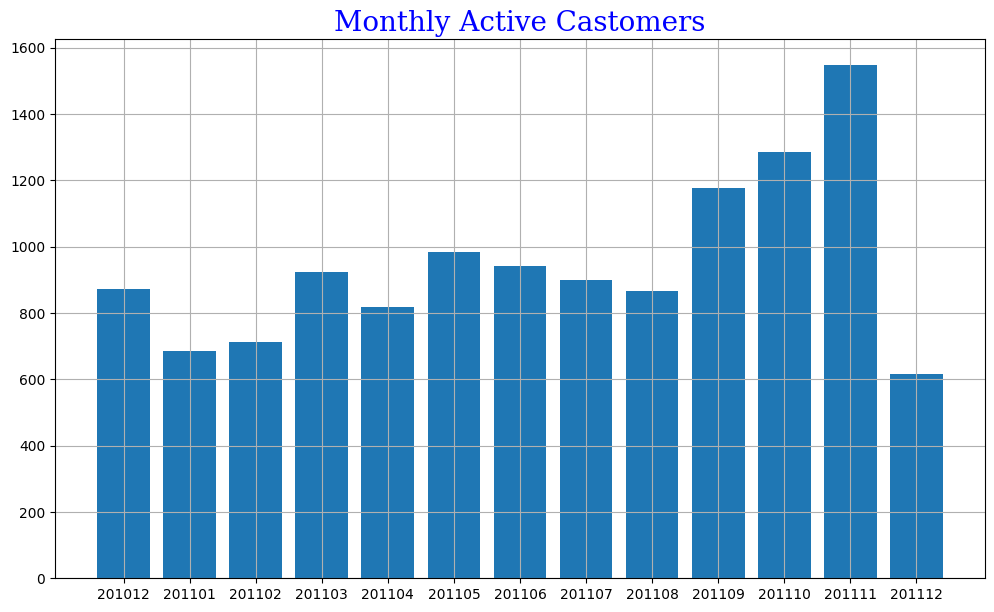

In [92]:
#plotting the output
plt.figure(figsize=(12,7))
plt.bar(tx_monthly_active['InvoicYearMonth'].to_numpy(dtype=(str)), tx_monthly_active['CustomerID'])


plt.title('Monthly Active Castomers', fontdict=font)
plt.grid()
plt.show()

In [93]:
#             ____________________________Monthly Order Count________________________________

#create a new dataframe for no. of order by using quantity field
tx_monthly_sales =tx_UK.groupby(['InvoicYearMonth'])['Quantity'].sum().reset_index()
#print in the dataframe
tx_monthly_sales 

,InvoicYearMonth,Quantity
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666
5,201105,306452
6,201106,258522
7,201107,324129
8,201108,319804
9,201109,458490


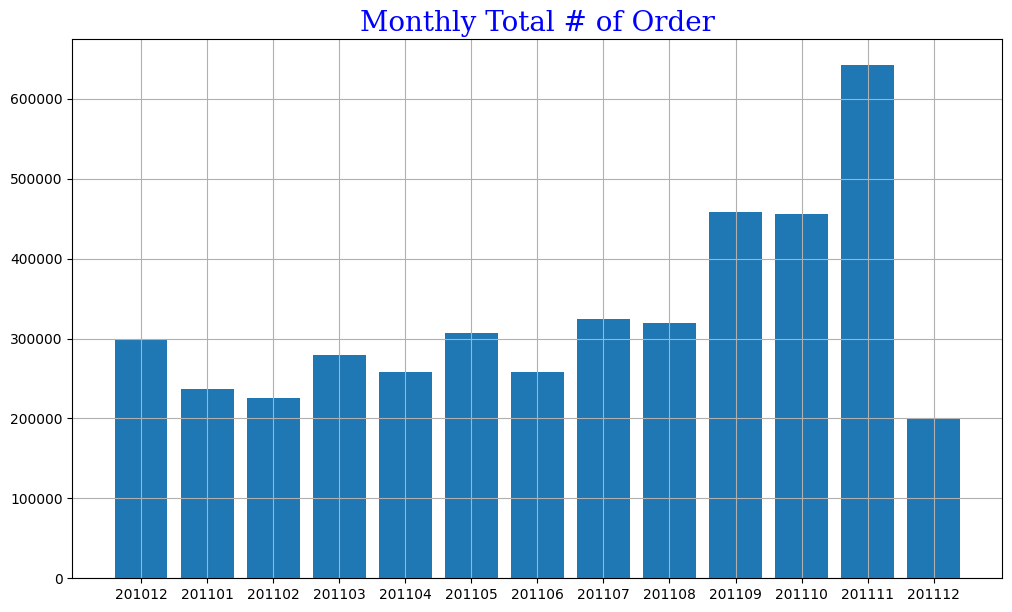

In [94]:
#plot
plt.figure(figsize=(12,7))
plt.bar(tx_monthly_sales['InvoicYearMonth'].to_numpy(dtype=str),tx_monthly_sales['Quantity'])


plt.title("Monthly Total # of Order" , fontdict=font)
plt.grid()
plt.show()

In [95]:
#                        ____________________Average Revenue per Order____________________________

# create a new dataframe for average revenue by taking the mean of it
tx_monthly_order_avg =tx_UK.groupby(['InvoicYearMonth'])['Revenue'].mean().reset_index()
#print the dataframe
tx_monthly_order_avg

,InvoicYearMonth,Revenue
0,201012,16.865860
1,201101,13.614680
2,201102,16.093027
3,201103,16.716166
4,201104,15.773380
5,201105,17.713823
6,201106,16.714748
7,201107,15.723497
8,201108,17.315899
9,201109,18.931723


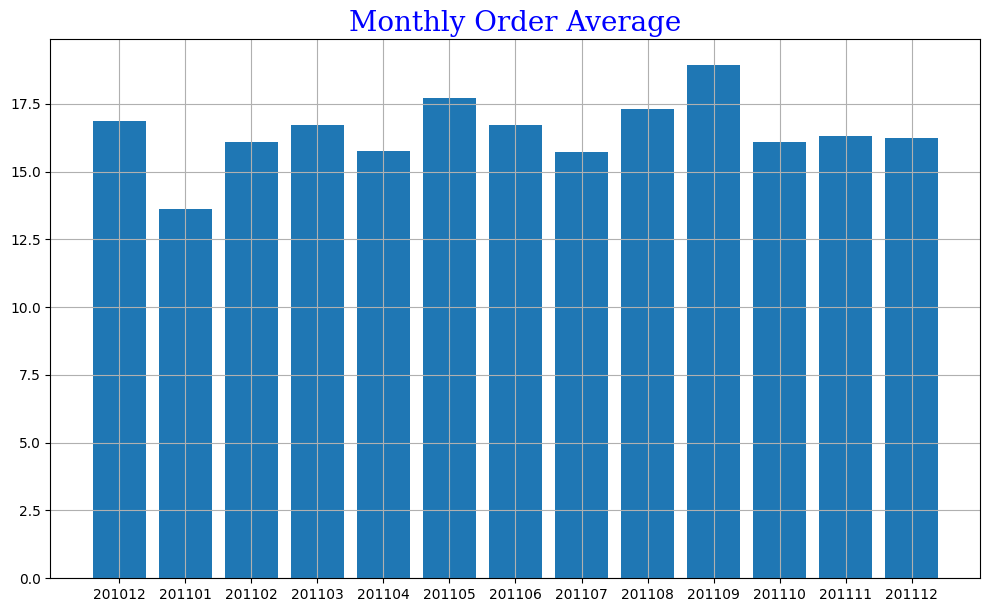

In [96]:
#plot the bar chart
plt.figure(figsize=(12,7))
plt.bar(tx_monthly_order_avg['InvoicYearMonth'].to_numpy(dtype=(str)),tx_monthly_order_avg['Revenue'])

plt.title("Monthly Order Average", fontdict=font)
plt.grid()
plt.show()

In [97]:
#            _______________________New Customer Ratio__________________________


#create a dataframe contaning CustomerID and first purchase date
tx_min_purchase =tx_UK.groupby(['CustomerID'])['InvoiceDate'].min().reset_index()
tx_min_purchase.columns = ['CustomerID','MinPurchaseDate']
tx_min_purchase['MinPurchaseYearMonth'] = tx_min_purchase['MinPurchaseDate'].map(lambda data: 100*data.year +data.month)


#merge first purchase date column to our main dataframe (tx_uk)
tx_uk = pd.merge(tx_UK, tx_min_purchase, on='CustomerID')

tx_uk.head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoicYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,201012,25.50,2010-12-01 08:26:00,201012
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,201012,11.10,2010-12-01 08:26:00,201012
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,201012,11.10,2010-12-01 08:26:00,201012
9,536372,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 09:01:00,1.85,17850.0,United Kingdom,201012,11.10,2010-12-01 08:26:00,201012


In [98]:
#create a column called User Type and assign Existing 
#if User's First Purchase Year Month before the selected Invoice Year Month
tx_UK['UserType'] = 'New'
tx_UK.loc[ tx_UK['InvoicYearMonth'] > tx_UK['MinPurchaseYearMonth'] , 'UserType'] = 'Existing'


#calculate the Revenue per month for each user type
tx_user_type_revenue = tx_UK.groupby(['InvoiceYearMonth','UserType'])['tx_Revenue'].sum().reset_index()

#filtering the dates and plot the result
tx_user_type_revenue.query("InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112")

plt.figure(figsize=(12,6))

plt.plot(tx_user_type_revenue.query("UserType == Existing")['InvoiceYearMonth'].to_numpy(dtype=(str))
        ,tx_user_type_revenue.query("UserType == Existing")['Revenue'] , label='Existing' , marker = 'o')

plt.plot(tx_user_type_revenue.query("UserType == New")['InvoiceYearMonth']
        ,tx_user_type_revenue.query("UserType == New")['Revenue'] , label ='New' , marker = 'o')

plt.grid()
plt.title("New vs Existing" , fontdict=font)
plt.show()

KeyError: 'MinPurchaseYearMonth'